# Employee Exit Surveys

The goal of the project is to analyse the data set contains employee exit surveys. They comes from Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institutes in Queensland, Australia. We need to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?




In [54]:
import pandas as pd 
import numpy as np
dete_survey = pd.read_csv("dete_survey.csv",na_values='Not Stated')
tafe_survey = pd.read_csv("tafe_survey.csv")
%matplotlib inline

In [18]:
print(dete_survey.info())
dete_survey.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [19]:
print(tafe_survey.info())
tafe_survey.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


From above description it is noticable that in the dete there are some numeric id, bool values(18), and other (37) columns are string objects. There are also some columns with new values. The columns with year contains 'Not state' value. Reread dataframe and fill those values with NaN.

Tafe data set looks much more complicated and will need a lot of cleaning tasks to do. A lot of columns is formulated as a questions and could contain long answers. Most of columns are string objects and two of them are floats (Id, and cessation year). There are also a lot not clear column names and rows contains not standarized answer. Most of the columns contains some null values.


In [20]:
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49])
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [21]:
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66])

We have dropped some of the unneccessary columns. 

In [22]:
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower().str.strip().str.replace(" ","_")
                              )

In [23]:
col_map = {"Record ID":"id","CESSATION YEAR":"cease_date",'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=col_map)

To make columns names more intuitive and similiar in each data set it is needed to change some of those names. The convention is snake case.

In [24]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [25]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [26]:
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [27]:
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [28]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")].copy()
tafe_survey_updated.dropna(inplace=True,subset=["separationtype"])
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation")].copy()

For now we are only interested in the entries which contains Resignation as a reason of dropping a job. This reason means that emploee could be dissatisfied with his work. 
There have been also one row with NaN value. Row has been dropped as it unknown value, so we assumed that it is other reason than 'resignation'

In [29]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [30]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [31]:
pattern = r"([1-2][0-9]{3})"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(pattern).astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [33]:
dete_resignations["cease_date"].value_counts(dropna=False).sort_index()

 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64

In [34]:
dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index()

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

In [35]:
tafe_resignations["cease_date"].value_counts(dropna=False).sort_index()

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64

It looks that there is no any wrong year in cease and start dates. I assumed that the wrong date means before 1940 and after 2015 (someone would be too old to work before 1940, and any dates couldn't be after survey has been done)

In [36]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

To check how long employee worked in job there is need to subtract start date from cease date in DETE data set (created column with time spended in job is named institute_service). In the TAFE data set there exists such column.

In [37]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [38]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [40]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True
tafe_dissatisfaction_cols =["Contributing Factors. Job Dissatisfaction","Contributing Factors. Dissatisfaction"]
dete_dissatisfaction_cols = ["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location","employment_conditions","work_life_balance","workload"]

tafe_resignations[tafe_dissatisfaction_cols] = tafe_resignations[tafe_dissatisfaction_cols].applymap(update_vals)
tafe_resignations["dissatisfied"] = tafe_resignations[tafe_dissatisfaction_cols].any(axis=1,skipna=False).copy()
dete_resignations["dissatisfied"] = dete_resignations[dete_dissatisfaction_cols].any(axis=1,skipna=False).copy()
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

There is some columns which poined that employee was dissatisfied with his job (see cells above). In TAFE data set columns contain some values which are string, we need to convert it to boolean values. 

After that I assumed that if any from columns listed in '_dissatisfaction_cols' in both datasets was set to True value, the employee was unhappy with his job.

In [41]:
tafe_resignations_up["institute"] = "TAFE"
dete_resignations_up["institute"] = "DETE"
combined = pd.concat([tafe_resignations_up,dete_resignations_up])

In [42]:
combine_updated = combined.dropna(axis=1,thresh=500)

Institute column will allow us to distinguish rows between datasets. Also we do not want to columns with has more than 500 null values, so they are dropped.

In [43]:
combine_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
14.0                   6
22.0                   6
10.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [48]:
splitted_range = combine_updated["institute_service"].astype(str).str.split('-',expand=True)
only_range_idx = ~splitted_range[1].isnull()
only_range = splitted_range[only_range_idx]
avg_year_range = (only_range.astype(float)[1] + only_range.astype(float)[0])/2
combine_updated_up = combine_updated.copy()
combine_updated_up.loc[only_range_idx,"institute_service"]  = avg_year_range

pattern = r'([0-9]+.?[0-9]?)'
combine_updated_up.loc[~only_range_idx, "institute_service"] = combine_updated_up.loc[~only_range_idx,"institute_service"].astype(str).str.extract(pattern)
combine_updated_up["institute_service"]=combine_updated_up["institute_service"].astype(float)

def carreer_stage(value):
    if pd.isnull(value):
        return None
    elif value < 3:
        return 'New'
    elif value < 6:
        return 'Expirienced'
    elif value < 10:
        return 'Established'
    else:
        return 'Veteran'
combine_updated_up["service_cat"] = combine_updated_up["institute_service"].apply(carreer_stage)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In the cell above I categorized how long the employee worked in job to 4 categories:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

I added new column 'service_cat'



In [49]:
combine_updated_up["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [50]:
combine_updated_up["dissatisfied"]=combine_updated_up["dissatisfied"].fillna(False)
combine_updated_up["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [51]:
diss_in_group = combine_updated_up.pivot_table(index="service_cat",values="dissatisfied")

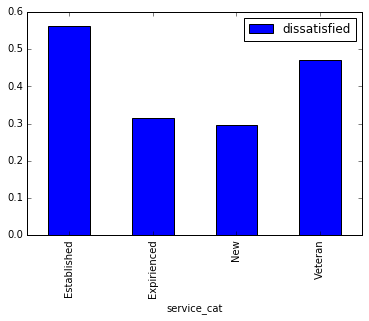

In [55]:
diss_in_group.plot(kind='bar')

We see that people who have worked for a shorter period of time quit their job because dissatisfied much often than people who stay longer than 3 years. We could say that more than half people judge the job very fast, and decide that there is some dissatisfaction. If they stay longer than this, they are more satisfied and change the job because some other things. 

There is also visible growth in veterans dissatisfaction job. Probably if someone works for a such a long time in company, he dont want to change the job and there would be some changes in work what caused dissatisfaction in job.

In [57]:
combine_updated_up["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [59]:
combine_updated_up["age"] = combine_updated_up["age"].str.replace("  ","-")

In [60]:
combine_updated_up["age"].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [61]:
diss_in_age = combine_updated_up.pivot_table(index="age",values="dissatisfied")

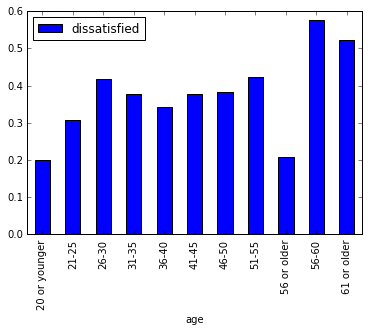

In [62]:
diss_in_age.plot(kind='bar')

I did not split 56 or older to two different categories 56-60 and '61 or older'. There is visible that older people are more dissatisfied with their job. The younger people are more satisfied with their job, what could be counter intuitive what we received with previous chart - dissatisfaction with service 